# Исследовательский анализ данных

# Проект "Компьютерное зрение"

**Цель:** Построить модель, которая по фотографии определит приблизительный возраст человека.

**Задачи**:
1. Проанализировать исходные данные.
2. Разработать модель и оценить ее качество предсказания возраста. Определить возможность применения модели для анализа покупок и предложения товаров, которые могут заинтересовать покупателей этой возрастной группы и контроля добросовестности кассиров при продаже алкоголя.

## Обзор данных

In [1]:
# Импорт библиотек и методов
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Чтение файла с метками
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
# Статистики меток
labels.describe(include='all')

,file_name,real_age
count,7591,7591.000000
unique,7591,NaN
top,000090.jpg,NaN
freq,1,NaN
mean,NaN,31.201159
std,NaN,17.145060
min,NaN,1.000000
25%,NaN,20.000000
50%,NaN,29.000000
75%,NaN,41.000000


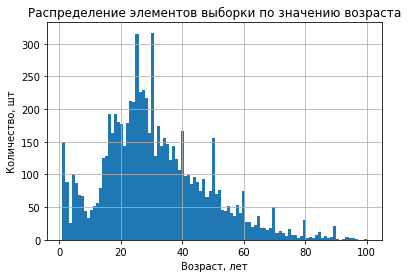

In [4]:
# Построение гистограммы по данным столбца real_age (возраст)
labels['real_age'].hist(bins=100)
plt.title('Распределение элементов выборки по значению возраста')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество, шт')
plt.show()

**Выводы**:

1. Распределение похоже на нормальное с скошенной вправо.

2. Исходя из распределения можно отметить, что данный датасет имеет несбалансированность по классам (возрасту), так количество фотографий с возрастом людей на них более 60 лет, значительно уступает количеству фотографий с людьми от 18 до 25 лет.  В тоже время фотографии с пожилыми людьми будут иметь значительно отличительные признаки (обусловленные естественным процессом старения), что возможно все будет хорошо.
3. Пропусков в данных нет.
4. Средний и медианны возрасты примерно равны, младенцев много, но возраст маленький, а старичков мыло, а возраст большой, поэтому они уравновешивают друг друга.
5. Наблюдаются пики на ровных и красивых датах (25, 30, 40, 50, 60, 70, 80), вероятно разметчик при отсутсвии данных о возрасте ставил приблизительный возрат близкий к перечисленным.
6. Размер выборки равен 7591 записей, что для решения подобной задачи моделирования слишком мал, получить высокое качество предсказания возраста модели вряд ли получится. 

In [5]:
#Создание экземпляра класса генератора изображений
train_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Чтение файла с изображениями из датафрейма, задание параметров чтения
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [7]:
# Запуск итератора, создание пар признак - метка
features, target = next(train_gen_flow)

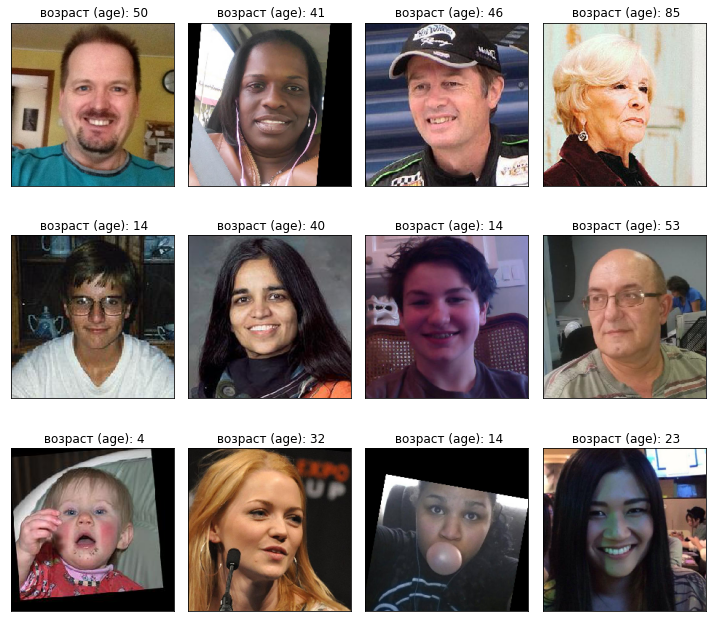

In [8]:
# Построение изображений с указание реального возраста из метки
fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(features[i])
    plt.title(f' возраст (age): {target[i]}')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Выводы**:

1. Фотографии в датасете присутствуют:
- в цветном и черно-белом цвете;
- с неправильной экспозицией (засвеченные и темные участки);
- с поворотом примерно от 5 до 45 градусов в разные стороны, при этом лицо человека находится в вертикальном положении;
- с низкой (старые фотографии) и высокой резкостью;
- с геометрическими искажениями связанными с процессом фотографирования (селфи);
- после цифровой обработки для вертикального расположения лица человека или его центрирование (характерные геометрические "узоры");
- с смещением относительно центра;
- с наличием на фотографии фрагментов других людей;
- с разным освещением, а также с ошибочным балансом белого (неестественные цвета).

2. Фотографии представлены в основом в виде портретов детей, подростков, взрослых и пожилых людей. Также присутствуют фотографии отличного от портрета жанра, без четкого изображения лица человека.

3. На фотографиях на людях могут быть надеты головные уборы, очки.

4. Дополнительно стоит отметить Квентина Тарантино, Билла Гейтса и любимца женщин актера с голливудской улыбкой оскароносца Тома Круза.

### Выводы по разделу

1. Произведен предварительный анализ исходных данных, представленных в виде портретов человека разного возраста.
2. Показано, что распределение данных по возрасту похоже на нормальное, скошенное вправо.
3. Фотографии в датасете частично имеют дефекты, разное качество.
4. Для повышения качества модели (предсказание) можно воспользоваться следующими аугментациями:
- horizontal_flip,
- brightness_range.

## Модель предсказния возраста на основе ResNet50

### Выводы по разделу

1. Модель предсказания возраста показала MAE = 5.9461 на тестовой выборке на 10 эпохе. Увеличение количества эпох до 40, позволяет уменьшить метрику до 5.6, но в тоже время происходит увеличение времени работы модели. При необходимости улучшения метрики возможно увеличение количества эпох.
2. Разработанная модель с метрикой MAE = 5.9461 (средняя абсолютная ошибка) вероятно не сможет точно предсказывать возраст в рассматриваемом диапазоне (1 - 100) лет, поэтому в соответствии с поставленной задачей, можно сделать вывод, что по результату работы модели (предсказанный возраст покупателя):
- можно определить возрастную группу покупателя;
- контроль добросовестности кассиров при продаже алкоголя не будет достаточно объективным.
3. Для контроля добросовестности кассиров при продаже алкоголя необходимо переучить модель предоставив ей больше данных с объектами пограничного возраста (18 лет) допускающего продажу алкоголя.

## Выводы по проекту

1. Разработана модель предсказания возраста покупателя на основе нейросети ResNet50.
2. Метрика качества модели MAE на тестовой выборке составила 5.9461, что соответствует требованиям проекта.
3. Для разработки модели с высоким качеством предсказания возраста необходимо использовать датасет большего размера, который будет также включать реальные данные полученные в магазине, которые будут наиболее объективными.